<br /><h1 style="font-family:Impact,Arial;font-size:70px;">US Housing Market</h1>
<h2 style="font-family:Arial;">William Lobb</h2>
<h2 style="font-family:Arial;">12960086</h2>
<p><small> 37373 Programming for Data Analysis</small></p>
<p><small><font color=MediumVioletRed>Autumn 2020</font></small>
</p>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />

# Abstract
This project will analyse the US State housing market through 3 distinct periods from 1996 until now.

The main goals of this project are to observe flucatuating housing prices over the last 3 decades and determine why there is such a diveregence in these boom and bust periods. These include the Boom Period (Jan 1996 - Mar 2006), Housing Bust (Apr 2006 - Dec 2011) and Recovery (Jan 2012 - Dec 2019).

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>1. Motivation</h1>

The reasoning behind fluctuations in housing market price growth and decline is of great interest to me. I want to understand which states and regions in the US have the greatest contributions towards boom and bust periods, and why this might be the case.

I would also like to see where the market is curently heading, despite the housing market having a slump during the first COVID-19 outbreak and lockdown, the market seems to be growing steadily again. 

Economists are saying that there exists a surge of people seeking a post-Covid lifestyle change during this period with minimal international travel and ultra-low interest rates; we could be seeing another boom period in the very near future.


<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>2. The data</h1>

The datasets used can be found and freely downloaded here:https://www.zillow.com/research/data/ and was last udpated 30/04/21.

The All homes Zillow Home Value Index (ZHVI) is a smoothed, seasonally adjusted measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range.

The data for homes for 1, 2, 3, 4 and 5+ bedrooms, all download as individual datasets were also used for comparison.
The value of homes in $USD, provided by ZHVI, is per square foot.

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>3. Data preparation</h1>



In [1995]:
# Importing all modules utilised 
from math import *
import numpy as np
import pandas as pd
from pathlib import Path

import seaborn as sns
sns.set_style('white')

from matplotlib import cm 

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

A number of datasets were used for the analysis, their values defined by housing meaurement i.e. 1 bedroom housing through to 5+ bedroom. I began by creating a dictionary for each file path, giving each key (file) a value (name).

In [1996]:
#Create a dicitonary for all files utilised
dict_file_paths = {'../Downloads/datasets/zvhi/State_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv': 'State_1bedroom',
    '../Downloads/datasets/zvhi/State_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv': 'State_2bedroom',
    '../Downloads/datasets/zvhi/State_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv': 'State_3bedroom',
    '../Downloads/datasets/zvhi/State_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv': 'State_4bedroom',
    '../Downloads/datasets/zvhi/State_zhvi_bdrmcnt_5_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv': 'State_5BedroomOrMore',
    '../Downloads/datasets/zvhi/State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv': 'State_AllHomes'
                  } 

I then ran a for loop over the file path dictionary, assigning a new column to define the housing measurement for each value.

In [1997]:
dict_dfs = {}
for path, name in dict_file_paths.items():
        df_name = str(name)
        dict_dfs[df_name] = pd.read_csv(path) #Import datasets
        dict_dfs[df_name].rename(columns={'Unnamed: 0':'Measurement'}, inplace=True) #Add new column using values from dict
        dict_dfs[df_name]['Measurement'] = df_name

In [1998]:
df = pd.concat(dict_dfs.values(), ignore_index=True, sort=False) #Concat the dict dataframes into one 

In [1999]:
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,31/01/1996,29/02/1996,31/03/1996,30/04/1996,31/05/1996,...,31/08/2020,30/09/2020,31/10/2020,30/11/2020,31/12/2020,31/01/2021,28/02/2021,31/03/2021,30/04/2021,Measurement
0,9,0,California,State,CA,104845.0,104697.0,104544.0,104252.0,104011.0,...,421588,425121,428407,431616,434759,437571,440491,443640,447972,State_1bedroom
1,54,1,Texas,State,TX,68159.0,68072.0,68035.0,68134.0,68191.0,...,124429,125272,126478,127946,129370,130398,131549,132583,134211,State_1bedroom
2,43,2,New York,State,NY,133566.0,133394.0,133241.0,133021.0,132826.0,...,361639,362980,364728,366799,368573,369832,370962,372151,373688,State_1bedroom
3,14,3,Florida,State,FL,56249.0,56289.0,56347.0,56448.0,56543.0,...,142589,143475,144417,145350,146442,147582,148676,149850,151103,State_1bedroom
4,21,4,Illinois,State,IL,86125.0,86067.0,85975.0,86019.0,85924.0,...,151660,152455,153263,154163,155005,155652,156368,157002,157853,State_1bedroom


Lets confirm that we have the correct number of states for each dataframe and housing measurement. District of Columbia has also been included as the 51st State.

In [2000]:
df.RegionName.unique()

array(['California', 'Texas', 'New York', 'Florida', 'Illinois',
       'Pennsylvania', 'Ohio', 'Michigan', 'Georgia', 'North Carolina',
       'New Jersey', 'Virginia', 'Washington', 'Massachusetts', 'Indiana',
       'Arizona', 'Tennessee', 'Missouri', 'Maryland', 'Wisconsin',
       'Minnesota', 'Colorado', 'Alabama', 'South Carolina', 'Louisiana',
       'Kentucky', 'Oregon', 'Oklahoma', 'Connecticut', 'Iowa',
       'Mississippi', 'Arkansas', 'Kansas', 'Utah', 'Nevada',
       'New Mexico', 'West Virginia', 'Nebraska', 'Idaho', 'Hawaii',
       'Maine', 'New Hampshire', 'Rhode Island', 'Montana', 'Delaware',
       'South Dakota', 'Alaska', 'North Dakota', 'Vermont',
       'District of Columbia', 'Wyoming'], dtype=object)

In [2001]:
df.Measurement.value_counts()

State_5BedroomOrMore    51
State_1bedroom          51
State_3bedroom          51
State_2bedroom          51
State_4bedroom          51
State_AllHomes          51
Name: Measurement, dtype: int64

Let begin by dropping columns that will not be very useful in the analysis. As the data is housing value by state, region ID and region type can be removed.

In [2002]:
df = df.drop(columns=[ 'RegionType', 'RegionID'])
df.head()

,SizeRank,RegionName,StateName,31/01/1996,29/02/1996,31/03/1996,30/04/1996,31/05/1996,30/06/1996,31/07/1996,...,31/08/2020,30/09/2020,31/10/2020,30/11/2020,31/12/2020,31/01/2021,28/02/2021,31/03/2021,30/04/2021,Measurement
0,0,California,CA,104845.0,104697.0,104544.0,104252.0,104011.0,103843.0,103704.0,...,421588,425121,428407,431616,434759,437571,440491,443640,447972,State_1bedroom
1,1,Texas,TX,68159.0,68072.0,68035.0,68134.0,68191.0,68259.0,68089.0,...,124429,125272,126478,127946,129370,130398,131549,132583,134211,State_1bedroom
2,2,New York,NY,133566.0,133394.0,133241.0,133021.0,132826.0,132645.0,132412.0,...,361639,362980,364728,366799,368573,369832,370962,372151,373688,State_1bedroom
3,3,Florida,FL,56249.0,56289.0,56347.0,56448.0,56543.0,56652.0,56763.0,...,142589,143475,144417,145350,146442,147582,148676,149850,151103,State_1bedroom
4,4,Illinois,IL,86125.0,86067.0,85975.0,86019.0,85924.0,86023.0,85999.0,...,151660,152455,153263,154163,155005,155652,156368,157002,157853,State_1bedroom


I will be classifying each state by broader geographical regions further in the analysis, so we will rename RegionName as State for to avoid confusion.

In [2003]:
df.rename(columns={'RegionName':'State'}, inplace=True)
df.head()

,SizeRank,State,StateName,31/01/1996,29/02/1996,31/03/1996,30/04/1996,31/05/1996,30/06/1996,31/07/1996,...,31/08/2020,30/09/2020,31/10/2020,30/11/2020,31/12/2020,31/01/2021,28/02/2021,31/03/2021,30/04/2021,Measurement
0,0,California,CA,104845.0,104697.0,104544.0,104252.0,104011.0,103843.0,103704.0,...,421588,425121,428407,431616,434759,437571,440491,443640,447972,State_1bedroom
1,1,Texas,TX,68159.0,68072.0,68035.0,68134.0,68191.0,68259.0,68089.0,...,124429,125272,126478,127946,129370,130398,131549,132583,134211,State_1bedroom
2,2,New York,NY,133566.0,133394.0,133241.0,133021.0,132826.0,132645.0,132412.0,...,361639,362980,364728,366799,368573,369832,370962,372151,373688,State_1bedroom
3,3,Florida,FL,56249.0,56289.0,56347.0,56448.0,56543.0,56652.0,56763.0,...,142589,143475,144417,145350,146442,147582,148676,149850,151103,State_1bedroom
4,4,Illinois,IL,86125.0,86067.0,85975.0,86019.0,85924.0,86023.0,85999.0,...,151660,152455,153263,154163,155005,155652,156368,157002,157853,State_1bedroom


The current date timeseries headings are in string form, hence we will need to run a for loop across the column axis to convert the to datetime. This is requried for plotting a time series for certain variables later in the project.

In [2004]:
for n in range(3,307): 
    df = df.rename(columns={df.columns[n]:pd.to_datetime(df.columns[n]).to_pydatetime().strftime("%Y-%m")})

In [2005]:
df.head()

,SizeRank,State,StateName,1996-01,1996-02,1996-03,1996-04,1996-05,1996-06,1996-07,...,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,Measurement
0,0,California,CA,104845.0,104697.0,104544.0,104252.0,104011.0,103843.0,103704.0,...,421588,425121,428407,431616,434759,437571,440491,443640,447972,State_1bedroom
1,1,Texas,TX,68159.0,68072.0,68035.0,68134.0,68191.0,68259.0,68089.0,...,124429,125272,126478,127946,129370,130398,131549,132583,134211,State_1bedroom
2,2,New York,NY,133566.0,133394.0,133241.0,133021.0,132826.0,132645.0,132412.0,...,361639,362980,364728,366799,368573,369832,370962,372151,373688,State_1bedroom
3,3,Florida,FL,56249.0,56289.0,56347.0,56448.0,56543.0,56652.0,56763.0,...,142589,143475,144417,145350,146442,147582,148676,149850,151103,State_1bedroom
4,4,Illinois,IL,86125.0,86067.0,85975.0,86019.0,85924.0,86023.0,85999.0,...,151660,152455,153263,154163,155005,155652,156368,157002,157853,State_1bedroom


Lets add a column to the dataset to help us define states by their Census region. This will be useful later in our analysis to provide any insights into correlations between housing value and geographical region in the States.

In [2006]:
#Defin confitions for each StateName
region_conditions = [
    (df.StateName.isin(['NY','PA','NJ','VT','CT','MA','RI','NH','ME','DC'])),
    (df.StateName.isin(['ND','SD','NE','KS','MO','IA','MN','WI','MI','OH','IN','IL'])),
    (df.StateName.isin(['DE','VA','MD','WV','NC','SC','KY','GA','TN','FL','AL','MS','LA','AR','OK','TX'])),
    (df.StateName.isin(['AK','HI','WA','OR','CA','MT','ID','NV','UT','AZ','NM','CO','WY','MT']))
]

regions = ['NEast','MWest','South','West'] #Define Regions

df['Region'] = np.select(region_conditions, regions) #Add new column 


In [2007]:
df.tail()

,SizeRank,State,StateName,1996-01,1996-02,1996-03,1996-04,1996-05,1996-06,1996-07,...,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,Measurement,Region
301,46,Alaska,AK,108706.0,109030.0,109229.0,109737.0,110118.0,110583.0,110997.0,...,289551,289942,290307,293766,294895,296259,297210,298872,State_AllHomes,West
302,47,North Dakota,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,236526,237206,238328,239501,240541,241646,242876,243979,State_AllHomes,MWest
303,48,Vermont,VT,117216.0,117047.0,116805.0,116376.0,115924.0,115395.0,114837.0,...,267468,269201,271706,274658,277263,280232,283404,287191,State_AllHomes,NEast
304,49,District of Columbia,DC,172943.0,172155.0,171460.0,170270.0,169337.0,168673.0,168102.0,...,670897,673652,677758,680326,681436,682692,685072,687652,State_AllHomes,NEast
305,50,Wyoming,WY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,261223,262095,263364,264568,265655,266735,267802,268991,State_AllHomes,West


## Dealing with missing values

Lets check the total amount of missing values in the new dataframe, and plot a missing value rate for each state and housing measurment. This will allow to visualise it bit better and target rows that need to be dealt with. 

In [2008]:
df.isnull().values.sum()

1496

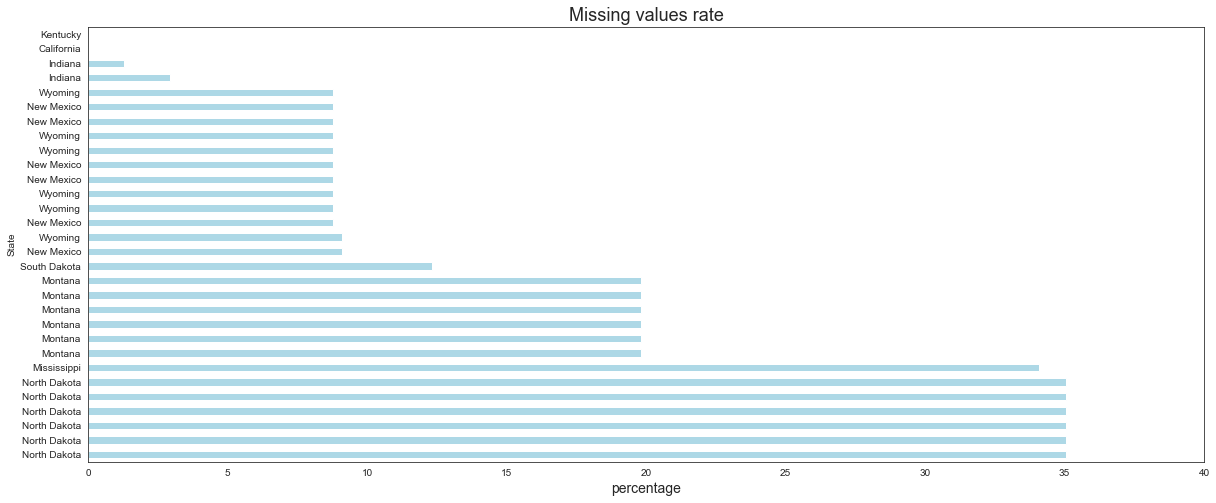

In [2009]:
plt.figure(figsize=(20, 8))
plt.rc('grid', color='#fff')

#Check null values using state as index, sorting by %
(df.set_index('State').isnull().mean(axis=1)*100).sort_values().nlargest(30).plot.barh(color ="Lightblue")

plt.xlim(xmax=40)
plt.title("Missing values rate",fontsize=18)
plt.xlabel("percentage",fontsize=14);

From this we can see that North Dakota, Montana, Wymoing, New mexico have missing values across all housing measurements, while mississippi, Indiana and South Dakota are only missing a few. 

Lets replace these NaN values with 0.

In [2010]:
df = df.replace(np.nan,0)
df

,SizeRank,State,StateName,1996-01,1996-02,1996-03,1996-04,1996-05,1996-06,1996-07,...,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,Measurement,Region
0,0,California,CA,104845.0,104697.0,104544.0,104252.0,104011.0,103843.0,103704.0,...,425121,428407,431616,434759,437571,440491,443640,447972,State_1bedroom,West
1,1,Texas,TX,68159.0,68072.0,68035.0,68134.0,68191.0,68259.0,68089.0,...,125272,126478,127946,129370,130398,131549,132583,134211,State_1bedroom,South
2,2,New York,NY,133566.0,133394.0,133241.0,133021.0,132826.0,132645.0,132412.0,...,362980,364728,366799,368573,369832,370962,372151,373688,State_1bedroom,NEast
3,3,Florida,FL,56249.0,56289.0,56347.0,56448.0,56543.0,56652.0,56763.0,...,143475,144417,145350,146442,147582,148676,149850,151103,State_1bedroom,South
4,4,Illinois,IL,86125.0,86067.0,85975.0,86019.0,85924.0,86023.0,85999.0,...,152455,153263,154163,155005,155652,156368,157002,157853,State_1bedroom,MWest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,46,Alaska,AK,108706.0,109030.0,109229.0,109737.0,110118.0,110583.0,110997.0,...,289551,289942,290307,293766,294895,296259,297210,298872,State_AllHomes,West
302,47,North Dakota,ND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,236526,237206,238328,239501,240541,241646,242876,243979,State_AllHomes,MWest
303,48,Vermont,VT,117216.0,117047.0,116805.0,116376.0,115924.0,115395.0,114837.0,...,267468,269201,271706,274658,277263,280232,283404,287191,State_AllHomes,NEast
304,49,District of Columbia,DC,172943.0,172155.0,171460.0,170270.0,169337.0,168673.0,168102.0,...,670897,673652,677758,680326,681436,682692,685072,687652,State_AllHomes,NEast


In [2011]:
df.isnull().values.sum()

0

We know there are 304 columns for each state in the time series, using the missing value percentages we can locate these missing values and fill them.

In [2012]:
df.dtypes

SizeRank         int64
State           object
StateName       object
1996-01        float64
1996-02        float64
                ...   
2021-02          int64
2021-03          int64
2021-04          int64
Measurement     object
Region          object
Length: 309, dtype: object

Close to half of time series housing values are dtype float, let isolate these columns and convert them to integers like the majority of values.

In [2013]:
cols = df.columns[df.dtypes.eq('float64')]
df[cols] = df[cols].astype('int64')
df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 309 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   SizeRank     int64 
 1   State        object
 2   StateName    object
 3   1996-01      int64 
 4   1996-02      int64 
 5   1996-03      int64 
 6   1996-04      int64 
 7   1996-05      int64 
 8   1996-06      int64 
 9   1996-07      int64 
 10  1996-08      int64 
 11  1996-09      int64 
 12  1996-10      int64 
 13  1996-11      int64 
 14  1996-12      int64 
 15  1997-01      int64 
 16  1997-02      int64 
 17  1997-03      int64 
 18  1997-04      int64 
 19  1997-05      int64 
 20  1997-06      int64 
 21  1997-07      int64 
 22  1997-08      int64 
 23  1997-09      int64 
 24  1997-10      int64 
 25  1997-11      int64 
 26  1997-12      int64 
 27  1998-01      int64 
 28  1998-02      int64 
 29  1998-03      int64 
 30  1998-04      int64 
 31  1998-05      int64 
 32  1998-06      int64 
 33  1998-07      i

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>4. Exploratory data analysis</h1>


Lets write a function for plotting states current All Homes housing value, by top and bottom Tier in terms of April 21 current all homes housing value. These percentile are defined by the top and bottom 17, being 33.33%.

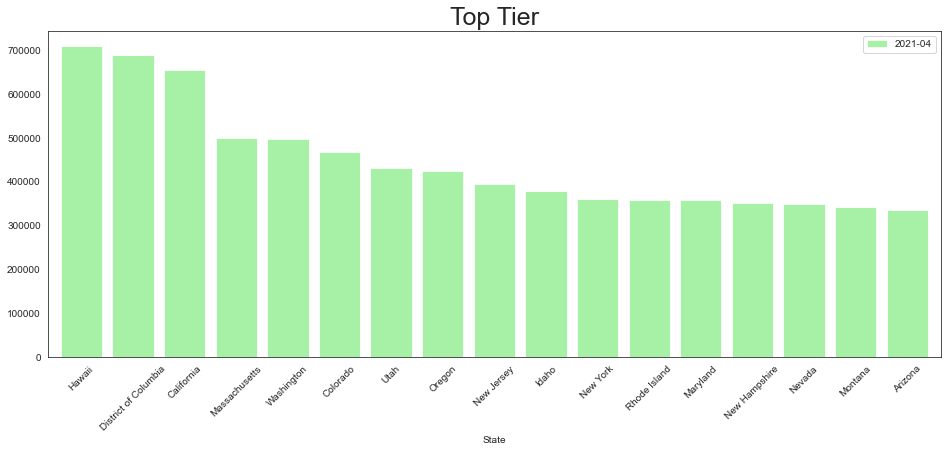

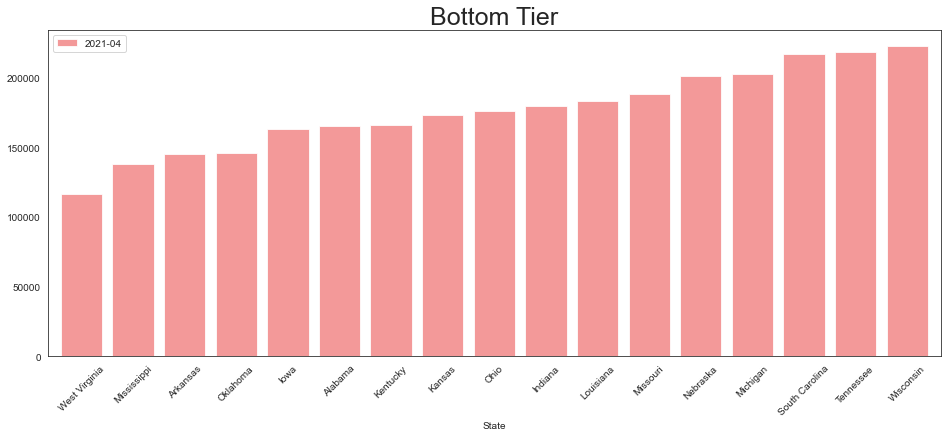

In [2014]:
TopTier = df[df.Measurement == 'State_AllHomes'][['State','2021-04']].set_index('State').nlargest(columns='2021-04', n=17)

BottomTier = df[df.Measurement == 'State_AllHomes'][['State','2021-04']].set_index('State').nsmallest(columns='2021-04', n=17)


TT_ax = TopTier.plot(kind = 'bar',figsize = (16,6),rot=45,
                  grid=True,color='lightgreen',
                  width=0.8, alpha=0.8)
TT_ax.set_title('Top Tier', fontsize = 25)
ax.set_ylabel('Price $USD');

MT_ax = BottomTier.plot(kind = 'bar',figsize = (16,6),rot=45,
                  grid=True,color='lightcoral',
                  width=0.8, alpha=0.8)
MT_ax.set_title('Bottom Tier', fontsize = 25)
ax.set_ylabel('Price $USD');

## CAGR by state

Lets look at the top 10 strongest gowing housing markets by state, calculating their compound annual growth rate over the last 5 and 10 years.

In [2015]:
def CAGR_5(state):
    state['5yr_CAGR'] = round((((state['2021-04']/state['2016-04'])**(1/5))-1)*100, 2)
    return state
df = df.groupby(['State', 'Measurement']).apply(CAGR_5)

def CAGR_10(state):
    state['10yr_CAGR'] = round((((state['2021-04']/state['2011-04'])**(1/10))-1)*100, 2)
    return state
df = df.groupby(['State', 'Measurement']).apply(CAGR_10)

df.head()

,SizeRank,State,StateName,1996-01,1996-02,1996-03,1996-04,1996-05,1996-06,1996-07,...,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,Measurement,Region,5yr_CAGR,10yr_CAGR
0,0,California,CA,104845,104697,104544,104252,104011,103843,103704,...,431616,434759,437571,440491,443640,447972,State_1bedroom,West,6.19,7.85
1,1,Texas,TX,68159,68072,68035,68134,68191,68259,68089,...,127946,129370,130398,131549,132583,134211,State_1bedroom,South,7.51,6.68
2,2,New York,NY,133566,133394,133241,133021,132826,132645,132412,...,366799,368573,369832,370962,372151,373688,State_1bedroom,NEast,3.72,3.02
3,3,Florida,FL,56249,56289,56347,56448,56543,56652,56763,...,145350,146442,147582,148676,149850,151103,State_1bedroom,South,6.02,7.47
4,4,Illinois,IL,86125,86067,85975,86019,85924,86023,85999,...,154163,155005,155652,156368,157002,157853,State_1bedroom,MWest,4.06,2.63


In [2016]:
state_5yr_cagr = pd.pivot_table(df, values='5yr_CAGR',   #Create a pivot table and sort values to view top 10
                   index=['State'])
state_5yr_cagr.sort_values(by='5yr_CAGR', ascending=False).head(10)

,5yr_CAGR
State,
Idaho,13.223333
Utah,10.470000
Washington,9.645000
Arizona,9.591667
Nevada,8.593333
Tennessee,7.936667
Michigan,7.685000
Georgia,7.496667
Colorado,7.476667


In [2017]:
state_10yr_cagr = pd.pivot_table(df, values='10yr_CAGR',   #Create a pivot table and sort values to view top 10
                   index=['State'])
state_10yr_cagr.sort_values(by='10yr_CAGR', ascending=False).head(10)

,10yr_CAGR
State,
Idaho,9.598333
Nevada,8.893333
Arizona,8.725000
Utah,7.885000
Washington,7.536667
California,7.346667
Colorado,7.343333
Michigan,7.135000
Oregon,6.831667


In [2018]:
top = ['Idaho','Nevada','Arizona','Utah','Washington','California','Colorado','Michigan','Florida']

Let's create a function to plot the top fastest growing states by CAGR (5yrs).

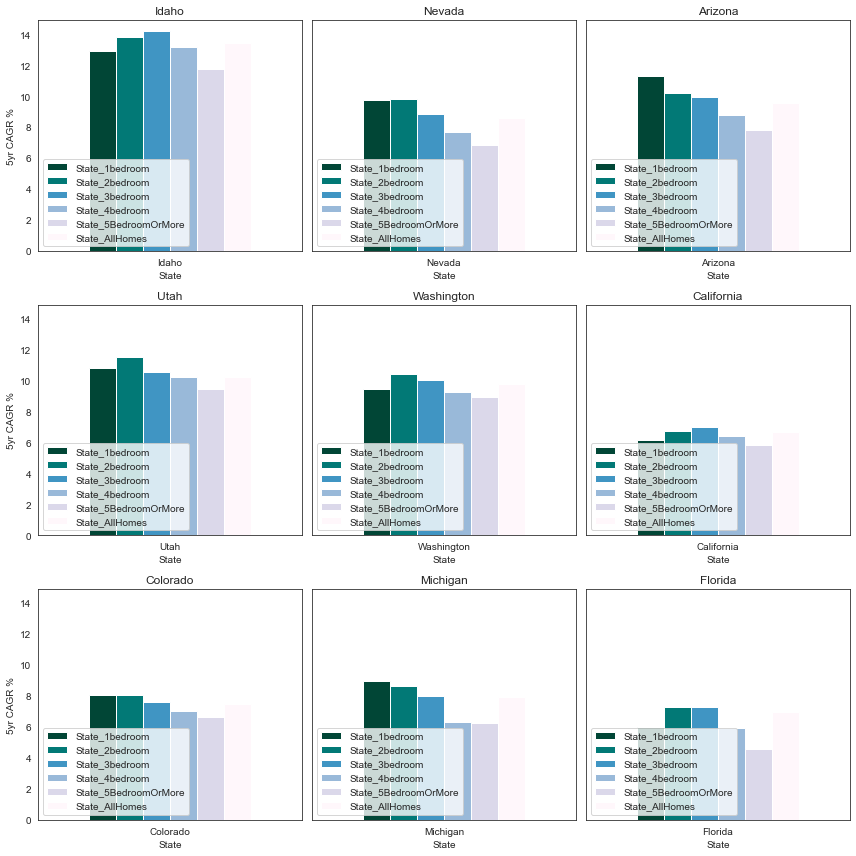

In [2019]:
def state_cagr_5yr(state='California', ax=None, figsize=(8,6)):
    ax = (df[df.State == state]
            .pivot_table('5yr_CAGR',
                        index='State',
                        columns='Measurement',
                        fill_value=0)
            .plot
            .bar(ax=ax,
                  rot=0, 
                  grid=True,
                  colormap='PuBuGn_r',
                  width=0.8,
                  alpha=1,
                  )
    )
    ax.set_ylabel('5yr CAGR %')
    ax.set_title(state)
    ax.legend(loc='lower left', frameon=True)
    
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharey=True)

for (state, ax) in zip(top, axes.flatten()):
     state_cagr_5yr(state, ax=ax)
        
fig.tight_layout()
plt.show()

Upon observation of the plots we could infer that smaller bedroom counts across states have a stronger 5yr CAGR in value. 

In [2020]:
region_cagr = df[df.Measurement == 'State_AllHomes'][['Region','State','5yr_CAGR']].set_index('Region')

rc = region_cagr.groupby(['Region','State']).sum().unstack(0).fillna(0)
rc.head()

5yr_CAGR                  
Region        MWest NEast South  West
State                                
Alabama         0.0   0.0  5.67  0.00
Alaska          0.0   0.0  0.00  2.15
Arizona         0.0   0.0  0.00  9.53
Arkansas        0.0   0.0  5.01  0.00
California      0.0   0.0  0.00  6.69

## Plotting housing Measures

Lets create a pivot table using a Multi Index grouping by state and measurement, dropping certain columns. 
The dataframe needs to be reshaped such that the column headings (years) are set as the index. Using transpose and unstack, the desired pivot table was created for plotting.

In [2021]:
groupby_state_and_measurment = df.pivot_table(index='State', columns=['Measurement']).T[1:].drop(index=['SizeRank','5yr_CAGR', '10yr_CAGR']).unstack(1)

groupby_state_and_measurment['Date'] = groupby_state_and_measurment.index #Column heading date for index time series

groupby_state_and_measurment = groupby_state_and_measurment.set_index('Date') #Set index
groupby_state_and_measurment.tail()

State              Alabama                                               \
Measurement State_1bedroom State_2bedroom State_3bedroom State_4bedroom   
Date                                                                      
2020-12           109318.0        99292.0       160208.0       267598.0   
2021-01           110767.0       100488.0       161764.0       269967.0   
2021-02           111938.0       101643.0       163379.0       272418.0   
2021-03           112907.0       102722.0       165040.0       274983.0   
2021-04           113917.0       103803.0       166814.0       277822.0   

State                                                   Alaska                 \
Measurement State_5BedroomOrMore State_AllHomes State_1bedroom State_2bedroom   
Date                                                                            
2020-12                 381067.0       159084.0       166563.0       218538.0   
2021-01                 384140.0       160524.0       167231.0       220008.0   
2021-02                 387275.0       162037.0       168039.0       221967.0   
2021-03                 390748.0       163640.0       168674.0       223599.0   
2021-04                 394585.0       165334.0       170379.0       225747.0   

State                                      ...      Wisconsin                 \
Measurement State_3bedroom State_4bedroom  ... State_3bedroom State_4bedroom   
Date                                       ...                                 
2020-12           305954.0       396439.0  ...       214308.0       274306.0   
2021-01           308110.0       399194.0  ...       216728.0       277298.0   
2021-02           310635.0       402645.0  ...       218987.0       280005.0   
2021-03           312657.0       405458.0  ...       221433.0       282980.0   
2021-04           315024.0       409090.0  ...       224048.0       286187.0   

State                                                  Wyoming                 \
Measurement State_5BedroomOrMore State_AllHomes State_1bedroom State_2bedroom   
Date                                                                            
2020-12                 317327.0       213402.0       182155.0       192978.0   
2021-01                 320643.0       215764.0       183098.0       193946.0   
2021-02                 323599.0       217932.0       184001.0       194945.0   
2021-03                 326932.0       220277.0       184936.0       196014.0   
2021-04                 330525.0       222738.0       185844.0       197188.0   

State                                                                          
Measurement State_3bedroom State_4bedroom State_5BedroomOrMore State_AllHomes  
Date                                                                           
2020-12           257825.0       302085.0             377447.0       264568.0  
2021-01           258860.0       303220.0             378869.0       265655.0  
2021-02           259876.0       304371.0             380326.0       266735.0  
2021-03           260930.0       305627.0             381806.0       267802.0  
2021-04           262113.0       307039.0             383414.0       268991.0  

[5 rows x 306 columns]

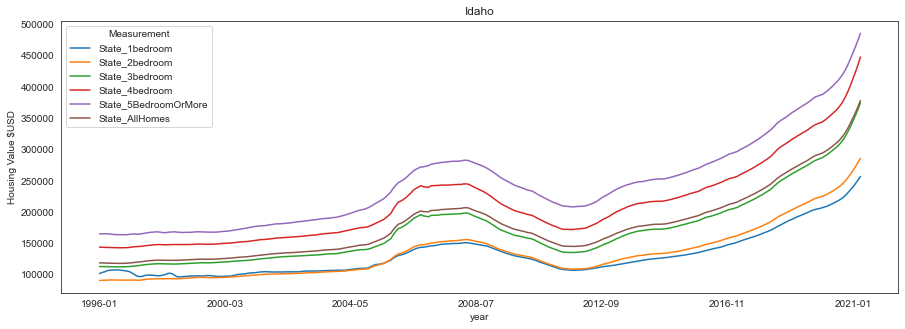

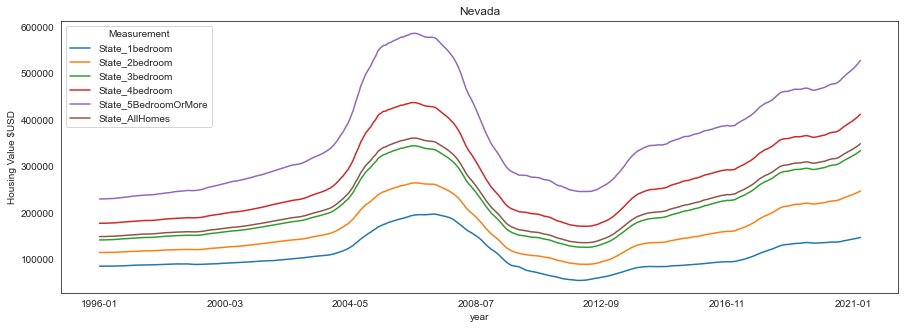

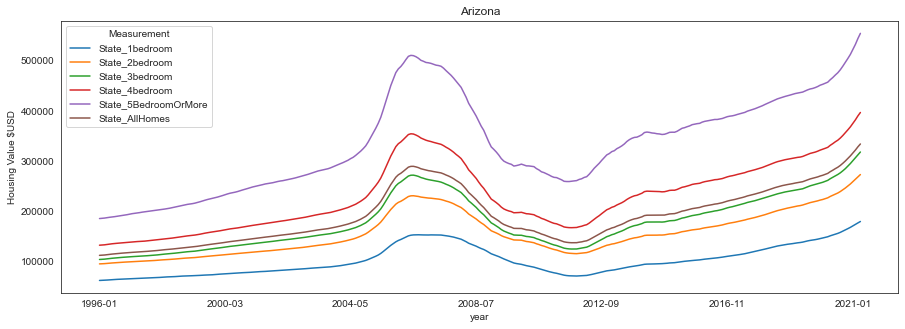

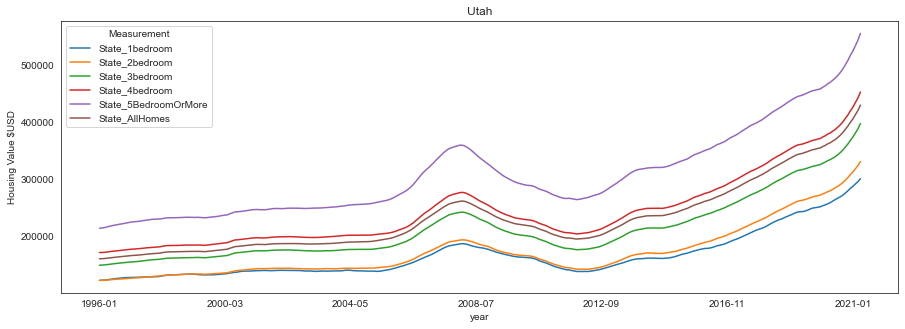

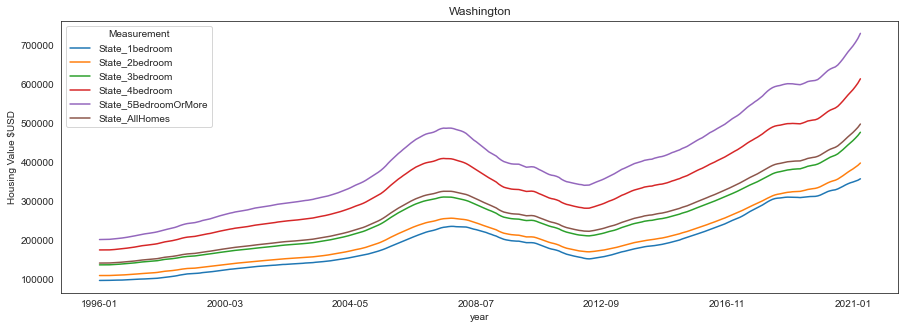

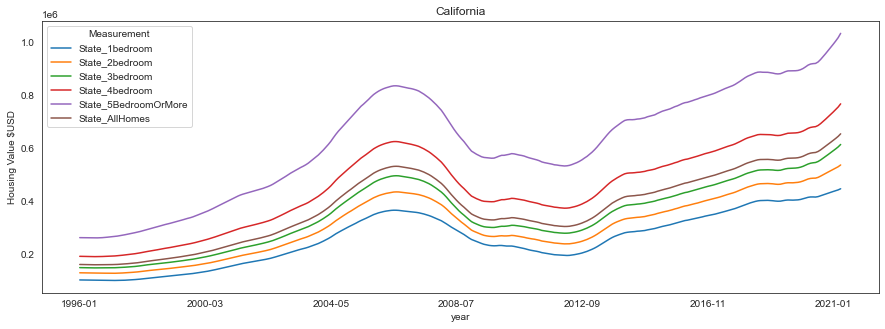

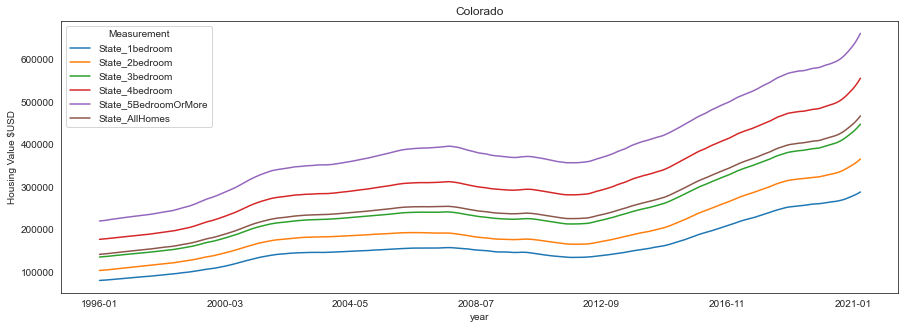

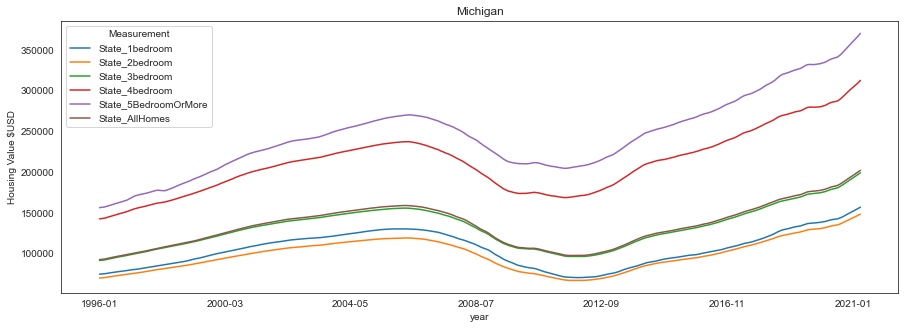

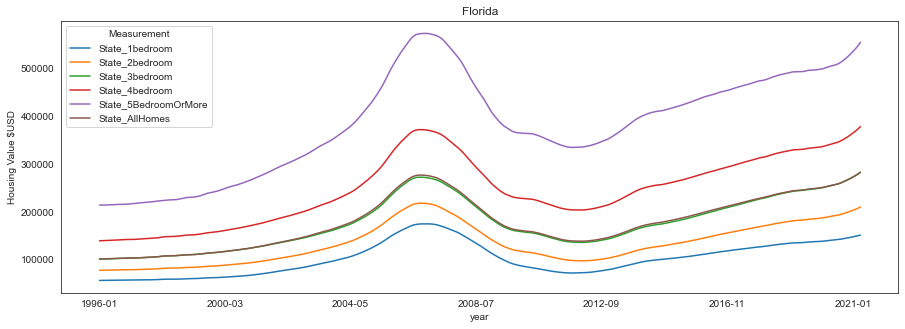

In [2022]:
def allmeasures_toptier(state='California', ax=None, ):
    ax = groupby_state_and_measurment.pivot_table(state,
                                             index='Date').plot( 
                                   grid=True, figsize = (15,5))
    ax.set_xlabel('year')
    ax.set_ylabel('Housing Value $USD')
    ax.set_title(state);


for (state, ax) in zip(top, axes.flatten()):
     allmeasures_toptier(state, ax=ax)
        
figs.tight_layout()
plt.show()

## All homes housing values across states

Lets now look at all homes value from groupby_state_and_measurment, getting the values for all states. 

In [2023]:
group_state_allhomes = groupby_state_and_measurment.iloc[:,groupby_state_and_measurment.columns.get_level_values(1)=='State_AllHomes']

group_state_allhomes.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Measurement,State_AllHomes,State_AllHomes,State_AllHomes,State_AllHomes,State_AllHomes,State_AllHomes,State_AllHomes,State_AllHomes,State_AllHomes,State_AllHomes,...,State_AllHomes,State_AllHomes,State_AllHomes,State_AllHomes,State_AllHomes,State_AllHomes,State_AllHomes,State_AllHomes,State_AllHomes,State_AllHomes
Date,,,,,,,,,,,,,,,,,,,,,
1996-01,85876.0,108706.0,111611.0,70167.0,163068.0,141823.0,151082.0,134445.0,172943.0,101229.0,...,103096.0,91926.0,98202.0,161464.0,117216.0,120801.0,141311.0,62703.0,97594.0,0.0
1996-02,85981.0,109030.0,111927.0,70198.0,162837.0,142289.0,150882.0,134388.0,172155.0,101326.0,...,103410.0,92109.0,98226.0,161607.0,117047.0,120740.0,141316.0,62708.0,97740.0,0.0
1996-03,86067.0,109229.0,112292.0,70276.0,162687.0,142673.0,151113.0,134327.0,171460.0,101439.0,...,103208.0,92331.0,98255.0,161889.0,116805.0,120740.0,141339.0,62710.0,97844.0,0.0
1996-04,86192.0,109737.0,112953.0,70387.0,162396.0,143454.0,151269.0,134182.0,170270.0,101650.0,...,102975.0,92766.0,98382.0,162392.0,116376.0,120706.0,141396.0,62722.0,98145.0,0.0
1996-05,86262.0,110118.0,113571.0,70517.0,162198.0,144142.0,151385.0,134300.0,169337.0,101853.0,...,102447.0,93219.0,98520.0,163051.0,115924.0,120646.0,141518.0,62726.0,98499.0,0.0


In [2024]:
group_state_allhomes.index = pd.to_datetime(group_state_allhomes.index) #Convert index to date time to assist plotting vertical lines and annotations
date_range = pd.date_range('1996-01','2021-04', freq='A-JAN')

The US housing market has 3 distinct periods over the last 3 decades; boom, bust and recovery. Now we will plot all homes value from 1996 til now, visualising price fluctuations over said time period. 

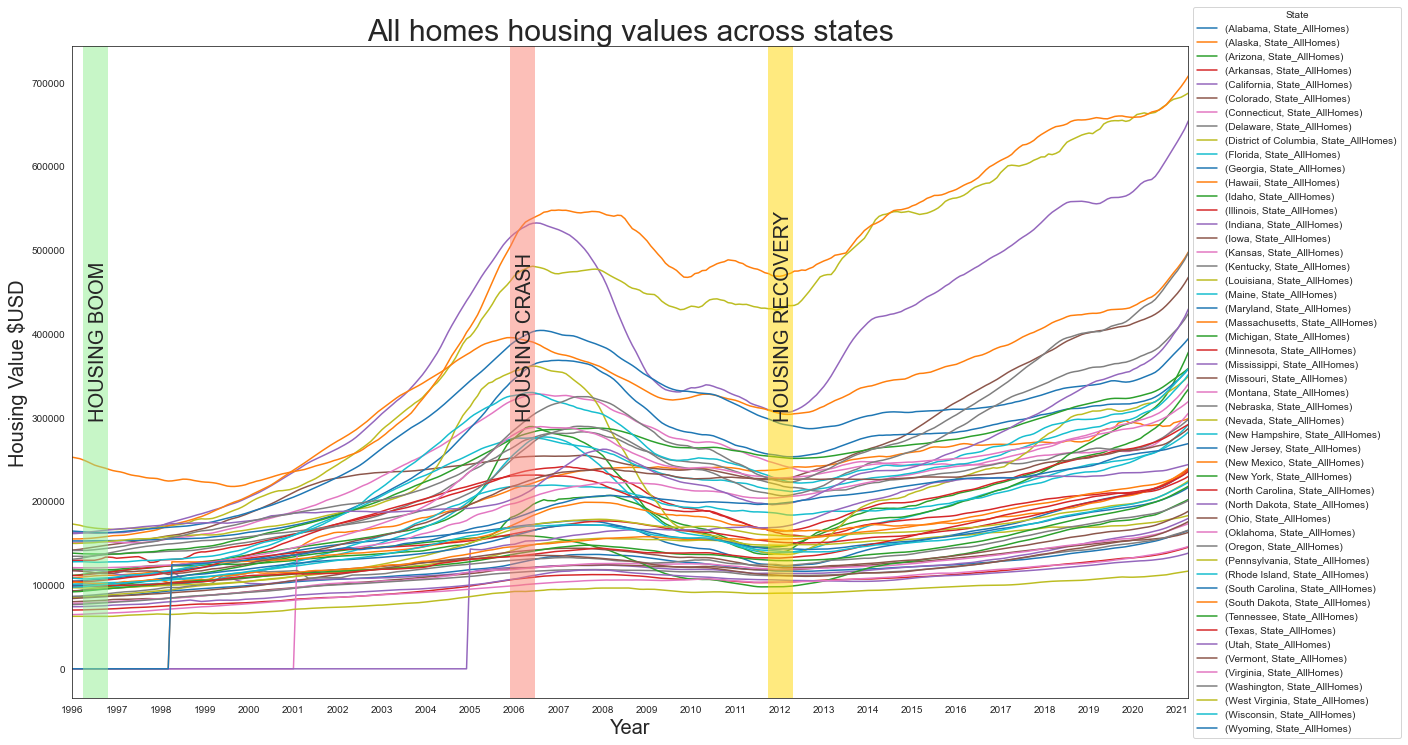

In [2025]:

ax = group_state_allhomes.plot(figsize=(20,12),
                               grid=True)
                               
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Housing Value $USD', fontsize=20)
ax.set_title('All homes housing values across states', fontsize=30)
ax.set_xticks(date_range)
ax.set_xlim(['1996-01-31', '2021-04-30'])
ax.set_xticklabels(date_range.year, rotation=0, ha='center')

ax.legend(title='State', bbox_to_anchor=(1.0, 0.5), loc='center left')
                                 
ax.axvline('1996-07-31', ymin=0, ymax=600000, lw=25, color='lightgreen', alpha=0.5)
ax.annotate('HOUSING BOOM', xy = ('1996-08-31', 300000),rotation=90,horizontalalignment='center',
                    fontsize= 20)

ax.axvline('2006-03-30', lw=25, ymin=0, ymax=600000, color='salmon', alpha=0.5)
ax.annotate('HOUSING CRASH', xy = ('2006-04-30', 300000),rotation=90,horizontalalignment='center',
                        fontsize= 20)

ax.axvline('2012-01', ymin=0, ymax=600000, lw=25, color='gold', alpha=0.5)
ax.annotate('HOUSING RECOVERY', xy = ('2012-02-29', 300000),rotation=90,horizontalalignment='center',
                        fontsize= 20);


In [2026]:
TT = list(TopTier.index)
TT

['Hawaii',
 'District of Columbia',
 'California',
 'Massachusetts',
 'Washington',
 'Colorado',
 'Utah',
 'Oregon',
 'New Jersey',
 'Idaho',
 'New York',
 'Rhode Island',
 'Maryland',
 'New Hampshire',
 'Nevada',
 'Montana',
 'Arizona']

In [2027]:
groupby_region_allmeaures = df.pivot_table(index='Region', columns=['Measurement']).T[:].drop(index=['SizeRank','5yr_CAGR','10yr_CAGR']).unstack(1)
groupby_region_allmeaures['Date'] = groupby_region_allhomes.index
groupby_region_allmeaures = groupby_region_allmeaures.set_index('Date')
groupby_region_allmeaures.tail(5)

Region               MWest                                               \
Measurement State_1bedroom State_2bedroom State_3bedroom State_4bedroom   
Date                                                                      
2020-12      113357.500000  141992.750000  197162.416667  278068.333333   
2021-01      114258.083333  143230.583333  198927.833333  280492.833333   
2021-02      115195.916667  144524.916667  200813.000000  283072.166667   
2021-03      116238.916667  145924.666667  202838.083333  285898.416667   
2021-04      117386.166667  147446.750000  205036.083333  289012.166667   

Region                                                   NEast                 \
Measurement State_5BedroomOrMore State_AllHomes State_1bedroom State_2bedroom   
Date                                                                            
2020-12            346182.000000  201272.750000       239714.7       283072.4   
2021-01            349046.500000  203029.583333       241462.6       285783.4   
2021-02            352036.416667  204883.666667       243321.4       288679.4   
2021-03            355289.833333  206876.083333       245306.4       291727.0   
2021-04            358856.750000  209032.916667       247450.5       295155.6   

Region                                     ...          South                 \
Measurement State_3bedroom State_4bedroom  ... State_3bedroom State_4bedroom   
Date                                       ...                                 
2020-12           347160.0       470361.0  ...    198557.9375    303821.1875   
2021-01           350906.3       475356.6  ...    200508.9375    306765.9375   
2021-02           354918.8       480714.6  ...    202559.3125    309907.1250   
2021-03           359181.4       486414.6  ...    204786.3750    313354.3750   
2021-04           364058.8       492888.2  ...    207273.1875    317177.8750   

Region                                                    West                 \
Measurement State_5BedroomOrMore State_AllHomes State_1bedroom State_2bedroom   
Date                                                                            
2020-12              423227.2500    207591.6250  255312.153846  306146.384615   
2021-01              427299.8125    209575.3125  257651.000000  309528.615385   
2021-02              431702.7500    211666.5625  260152.692308  313215.923077   
2021-03              436607.6250    213941.6875  262811.769231  317146.769231   
2021-04              442082.1250    216479.8125  266000.230769  321701.307692   

Region                                                                         
Measurement State_3bedroom State_4bedroom State_5BedroomOrMore State_AllHomes  
Date                                                                           
2020-12      384448.538462  475297.692308        581280.692308  393431.153846  
2021-01      389218.384615  481090.307692        588010.384615  398054.538462  
2021-02      394405.692308  487499.692308        595375.692308  403115.307692  
2021-03      399953.769231  494424.384615        603378.769231  408527.384615  
2021-04      406289.153846  502398.230769        612545.846154  414766.076923  

[5 rows x 24 columns]

Lets plot each region and housing measure.

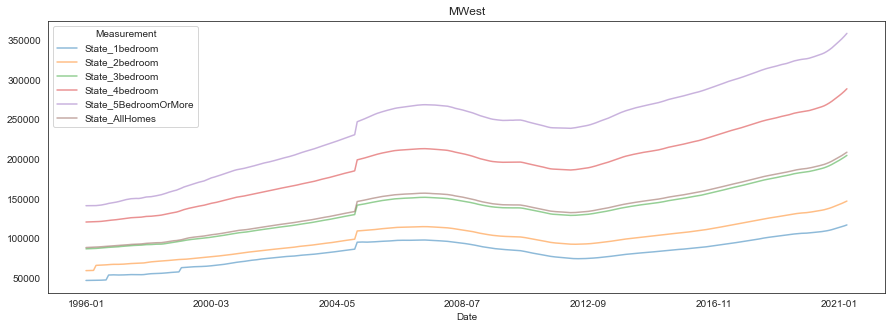

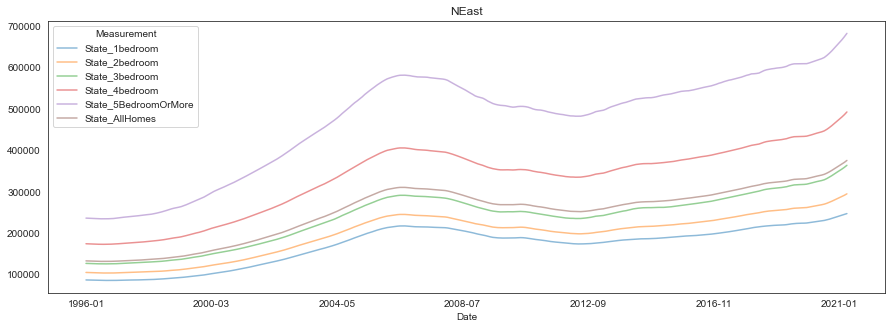

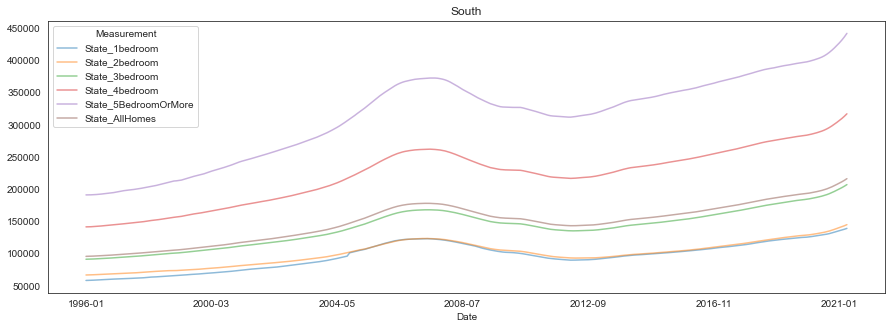

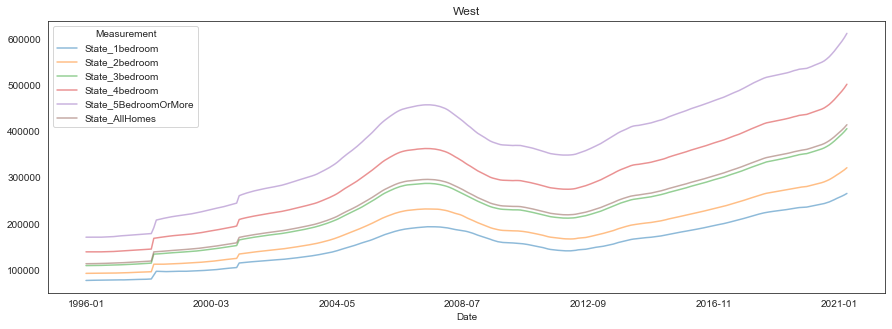

In [2028]:
def region_all_measures(region, figsize=(15,5)):
    ax = (groupby_region_allmeaures
              .pivot_table(region,
                            index='Date')
            .plot(figsize=figsize,  
                  alpha=0.5,
                 sharey=True)
         )
    ax.set_title(region)

for region in ['MWest','NEast','South',"West"]: 
    region_all_measures(region)

## Boom Period (Jan 1996 - Mar 2006)
Between 1996 and 2006, the housing market enters a positive price feedback loop–in. Ultimately any price increase resulted in a further rise in house price growth rates, this triggered the boom period.

Now lets create a chart showing the top states with the largest price growth in this boom period. 

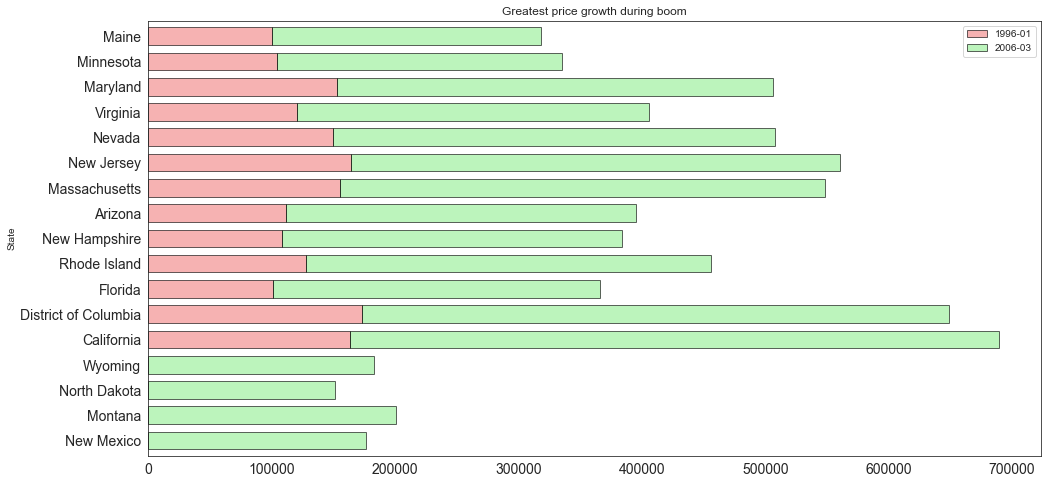

In [2029]:
def boom_pct(state):
    state['Boom_period_pc'] = round((state['2006-03']-state['1996-01'])/state['1996-01']*100, 2)
    return state
df = df.groupby(['State','Measurement']).apply(boom_pct)

Top17_Boom = df[df.Measurement == 'State_AllHomes'][['State','1996-01','2006-03','Boom_period_pc']].set_index('State').nlargest(columns= 'Boom_period_pc',n=17).drop(columns='Boom_period_pc')

Top17_Boom_ax = Top17_Boom.plot(kind='barh', 
                                stacked=True, 
                                fontsize=14,
                                width=0.7, ec='k',alpha=0.6, figsize = (16,8),
                                color = ["lightcoral", "lightgreen"], 
                                title = 'Greatest price growth during boom')

In [2030]:
list(Top17_Boom.index)

['New Mexico',
 'Montana',
 'North Dakota',
 'Wyoming',
 'California',
 'District of Columbia',
 'Florida',
 'Rhode Island',
 'New Hampshire',
 'Arizona',
 'Massachusetts',
 'New Jersey',
 'Nevada',
 'Virginia',
 'Maryland',
 'Minnesota',
 'Maine']

### Regional Contribution to housing boom

I would like see which region contributed the most to the top percentile of growth plotted above. Lets create a groupby dataframe and plot this in a chart to showcase the weightings. We will do this for each distinct housing market period.

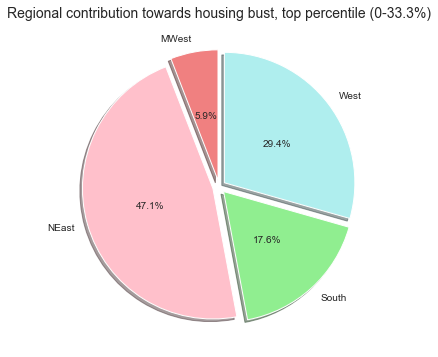

In [2031]:
Top17_boom =(['California','District of Columbia','Florida','Rhode Island',
              'New Hampshire','Arizona','Massachusetts','New Jersey','Nevada',
              'Virginia','Maryland','Minnesota','Maine','Connecticut','Hawaii',
              'Washington','New York'])


top_boom_region = df[df['State'].isin(Top17_boom)].groupby('Region')['State'].size()


pie, ax = plt.subplots(figsize=[10,6])

labels = top_boom_region.keys()
plt.pie(x=top_boom_region, autopct="%.1f%%", 
        explode=[0.05]*4, labels=labels, pctdistance=0.5, 
        shadow= True, startangle=90,
        colors = ['lightcoral',"pink","lightgreen","paleturquoise"])

plt.title("Regional contribution towards housing bust, top percentile (0-33.3%)", fontsize=14);
pie.savefig("regional_boom.png")

The North East region of the US contributes to almost 50% of the top housing price growth.

## Housing Bust (Apr 2006 - Dec 2011)
Beginning in 2006, the rapid house pricegrowth reverses with slowing appreciation, followed by a catastrophic collapse between 2007 and 2008, house price growth rates dropped simultaneously nation wide.

Now lets create a chart showing the top states with the largest price decline during the US housing bust. 

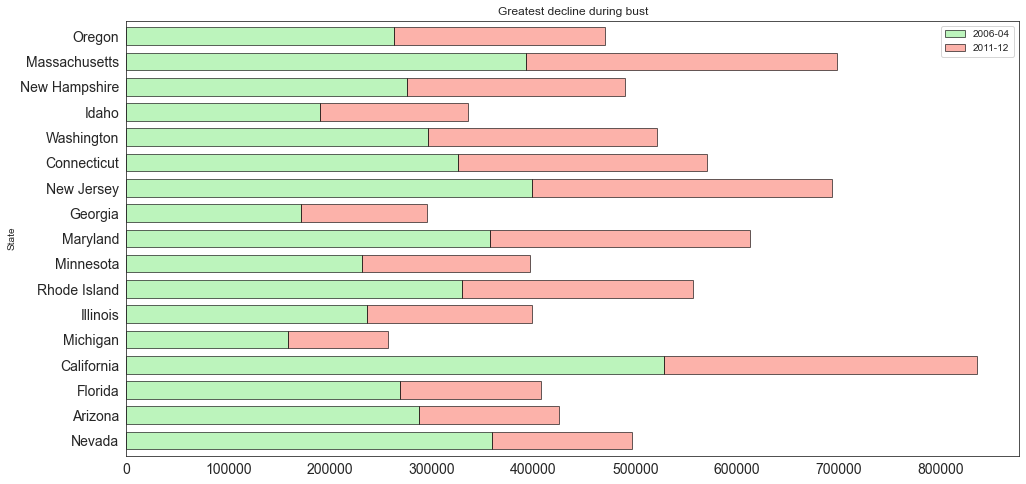

In [2032]:
def decline_pct(state):
    state['decline_period_pct'] = round((state['2011-12']-state['2006-04'])/state['2006-04']*100, 2)
    return state

df = df.groupby(['State','Measurement']).apply(decline_pct)


Top17_largest_decline = df[df.Measurement == 'State_AllHomes'][['State','2006-04','2011-12','decline_period_pct']].set_index('State').nsmallest(columns = 'decline_period_pct', n=17).drop(columns='decline_period_pct')

Top17_largest_decline_ax = Top17_largest_decline.plot(kind='barh', 
                                                      stacked=True, 
                                                      fontsize=14,
                                                      width=0.7, ec='k',alpha=0.6, figsize = (16,8),
                                                      color = ["lightgreen", "salmon"], 
                                                      title = 'Greatest decline during bust')

In [2033]:
list(Top17_largest_decline.index)

['Nevada',
 'Arizona',
 'Florida',
 'California',
 'Michigan',
 'Illinois',
 'Rhode Island',
 'Minnesota',
 'Maryland',
 'Georgia',
 'New Jersey',
 'Connecticut',
 'Washington',
 'Idaho',
 'New Hampshire',
 'Massachusetts',
 'Oregon']

### Regional Contribution to housing bust

Lets look at regional contributions to the top percentile of housing decline, statewise.

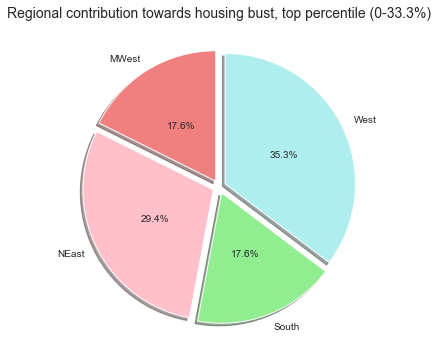

In [2034]:
Top17_decline = (['Nevada','Arizona','Florida','California','Michigan','Illinois','Rhode Island',
                  'Minnesota','Maryland','Georgia','New Jersey','Connecticut','Washington','Idaho',
                  'New Hampshire','Massachusetts','Oregon'])


largest_decline_region = df[df['State'].isin(Top17_decline)].groupby('Region')['State'].size()


pie, ax = plt.subplots(figsize=[10,6])

labels = largest_decline_region.keys()
plt.pie(x=largest_decline_region, autopct="%.1f%%", 
        explode=[0.05]*4, labels=labels, pctdistance=0.5, 
        shadow= True, startangle=90,
        colors = ['lightcoral',"pink","lightgreen","paleturquoise"])

plt.title("Regional contribution towards housing bust, top percentile (0-33.3%)", fontsize=14);
pie.savefig("Largest_decline_region.png")

Lets look at regional contributions to the top percentile of housing growth during the recovery boom, statewise.

## Recovery (Jan 2012 - Dec 2019)
The rapid decline in housing price growth rates began to alleviate in 2009, however positive did not spark again until around 2012. The housing bust between 07-09 clearly displays a distinct divergence from the initial boom period and markets recent recovery.

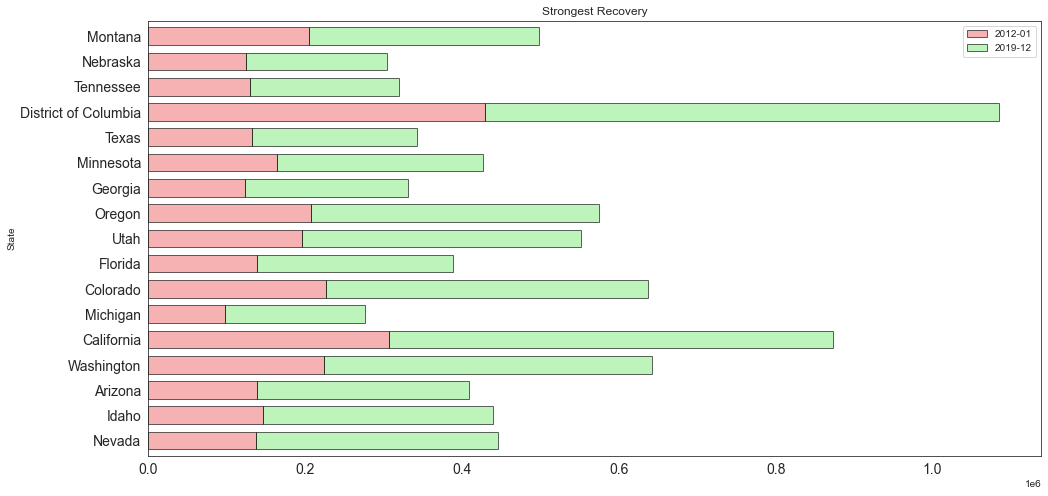

In [2035]:
def recovery_pct(state):
    state['recovery_boom_pct'] = round((state['2019-12']-state['2012-01'])/state['2012-01']*100, 2)
    return state

df = df.groupby(['State','Measurement']).apply(recovery_pct)

recovery_boom = df[df.Measurement == 'State_AllHomes'][['State','2012-01','2019-12','recovery_boom_pct']].set_index('State').nlargest(columns = 'recovery_boom_pct', n=17).drop(columns='recovery_boom_pct')

recovery_boom_ax = recovery_boom.plot(kind='barh', 
                                      stacked=True, 
                                      fontsize=14,
                                      width=0.7, ec='k',alpha=0.6, figsize = (16,8),
                                      color = ["lightcoral", "lightgreen"], 
                                      title = 'Strongest Recovery');

In [2036]:
list(recovery_boom.index)

['Nevada',
 'Idaho',
 'Arizona',
 'Washington',
 'California',
 'Michigan',
 'Colorado',
 'Florida',
 'Utah',
 'Oregon',
 'Georgia',
 'Minnesota',
 'Texas',
 'District of Columbia',
 'Tennessee',
 'Nebraska',
 'Montana']

Lets look at regional contributions to the top percentile of housing growth during the recovery boom, statewise.

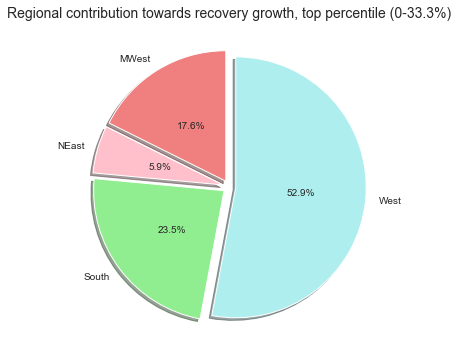

In [2037]:
Top17_recov_boom = (['Nevada','Idaho','Arizona','Washington','California','Michigan',
                     'Colorado','Florida','Utah','Oregon','Georgia','Minnesota','Texas',
                     'District of Columbia','Tennessee','Nebraska','Montana'])


top_recovery_region = df[df['State'].isin(Top17_recov_boom)].groupby('Region')['State'].size()


pie, ax = plt.subplots(figsize=[10,6])

labels = top_recovery_region.keys()
plt.pie(x=top_recovery_region, autopct="%.1f%%", 
        explode=[0.05]*4, labels=labels, pctdistance=0.5, 
        shadow= True, startangle=90,
        colors = ['lightcoral',"pink","lightgreen","paleturquoise"])

plt.title("Regional contribution towards recovery growth, top percentile (0-33.3%)", fontsize=14);
pie.savefig("recovery_boom.png")

Dissimilar to the intial boom period of 96-06, the Western region of the states had majority of greatest price growth at 52.9%.

## Today

Below I have plotted the year-on-year (April 2020-2021 Q3) growth for the top 10 states. The housing boom continues as movement to suburbs contributes to an increase in home buying pressure and perpetually low interest rates. 

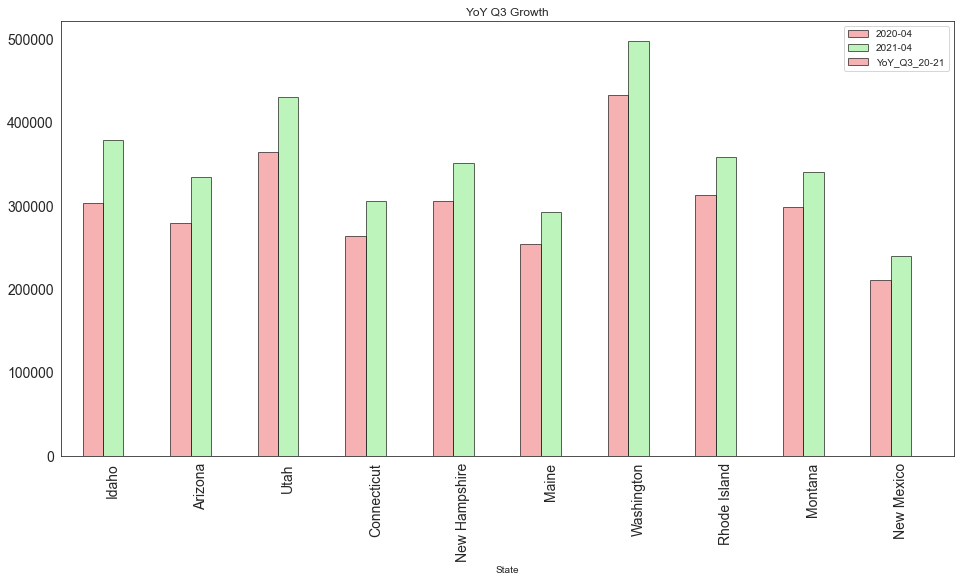

In [2038]:
def YoY(state):
    state['YoY_Q3_20-21'] = round((state['2021-04']-state['2020-04'])/state['2020-04']*100, 2)
    return state
df = df.groupby(['State', 'Measurement']).apply(YoY)

Top10_YoY_21 = df[df.Measurement == 'State_AllHomes'][['State','2020-04','2021-04','YoY_Q3_20-21']].set_index('State').nlargest(columns = 'YoY_Q3_20-21', n=10)

Top10_YoY_21_ax = Top10_YoY_21.plot(kind='bar', stacked=False, fontsize=14,width=0.7, ec='k',alpha=0.6, figsize = (16,8),
                                     color = ["lightcoral", "lightgreen"], title = 'YoY Q3 Growth');

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>5. Results/Insights</h1>


#### Fastest growing/declining regions during different periods
It was interesting to note that during the intial boom period of 96-06, the North East region of the US dominated the BOOM in terms of the fastest growing states. 

This compared to the recent recovery boom, revealed that the Western Region held majority of growth in the top percentile.

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>6. In hindsight...</h1>

In this section you should reflect on your work and what you've learned. In particular you should include:

<ul>
    <li> a discussion of the most challenging aspect of the data analysis and if/how you overcame the challenge.</li>
    <li> a discussion of any programming technique and/or reference you found particularly useful or helpful for your project.</li>
    <li> an assessment of the outcome of the study in relation to the original goals (i.e., have the goals been reached, or did you have to reassess the goals during the project, and if so why?).</li>
    <li> a discussion of what new, or surprising knowledge or insight into the problem you've gained by conducting the study.</li>
    <li> a discussion of whether you would approach the problem differently if given an opportunity to redo the work, and any advice they would give to someone who would want to work on a similar problem.</li>
    <li> a discussion of how your analysis could be improved or extended in future work.</li>

</ul>

#### Challenges
One of the most challeging aspects of the analysis was filling NaN values in the data. 6 of the states had null values ranging from 1996 to 2004. I researched ways to back fill these values based on the forward 10 year CAGR beginning at from the value directly following the first NaN in the times series, however was unsuccessful in this. 

The scope of the data, regarding the range of different variables was not very large, thus the ability for analysis was slighlty limited. I overcame this by generating additional columns such as region and CAGR, to allow me to provide non-trivial insights into the data. 

#### Useful programming techniques/references
Matplotlib and Pandas were the most useful modules throughout my analysis. Particulary grouby and pivot tables that allowed me to isolate specific data for each individual bit of analysis.  

#### Outcome of Study
I was able to understand which states contributed the most to the growth and decline in each housing market period, and observe how geographical location and external economic factors had role in these fluctuations.

#### Insight
Before this study I had vague understanding of US housing values, grouping states by tiers and the price fluctations through significant housing market periods. I now comfortably understand all this.

#### Improvement and extensions
The analysis could be improved by gathering more datasets from Zillow to add to the data frame library of my project. I would have done analysis by US Metro, which would have allowed me to analyse rental data against housing value. Zillow unfortunately did not provide a whole range of data by state, in terms of Median house price and sales number etc. 

I would have made some projections of housing values into the next 5 years as well.